In [2]:
#Importing libraries

import os
import numpy as np
import pandas as pd

In [3]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline   
#magic arguments it enables inline plotting where plotted graphics appear in your notebook

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
data = pd.read_csv("data.csv")
genre_data = pd.read_csv("data_w_genres.csv")
year_data = pd.read_csv("data_by_artist.csv")

In [7]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [8]:
print(genre_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            28680 non-null  object 
 1   artists           28680 non-null  object 
 2   acousticness      28680 non-null  float64
 3   danceability      28680 non-null  float64
 4   duration_ms       28680 non-null  float64
 5   energy            28680 non-null  float64
 6   instrumentalness  28680 non-null  float64
 7   liveness          28680 non-null  float64
 8   loudness          28680 non-null  float64
 9   speechiness       28680 non-null  float64
 10  tempo             28680 non-null  float64
 11  valence           28680 non-null  float64
 12  popularity        28680 non-null  float64
 13  key               28680 non-null  int64  
 14  mode              28680 non-null  int64  
 15  count             28680 non-null  int64  
dtypes: float64(11), int64(3), object(2)
memo

In [9]:
print(year_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28680 entries, 0 to 28679
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mode              28680 non-null  int64  
 1   count             28680 non-null  int64  
 2   acousticness      28680 non-null  float64
 3   artists           28680 non-null  object 
 4   danceability      28680 non-null  float64
 5   duration_ms       28680 non-null  float64
 6   energy            28680 non-null  float64
 7   instrumentalness  28680 non-null  float64
 8   liveness          28680 non-null  float64
 9   loudness          28680 non-null  float64
 10  speechiness       28680 non-null  float64
 11  tempo             28680 non-null  float64
 12  valence           28680 non-null  float64
 13  popularity        28680 non-null  float64
 14  key               28680 non-null  int64  
dtypes: float64(11), int64(3), object(1)
memory usage: 3.3+ MB
None


In [10]:
from yellowbrick.target import FeatureCorrelation

feature_names = ['acousticness','danceability','energy','instrumentalness','liveness','loudness','speechiness','tempo','valence','duration_ms','explicit','key','mode','year']

In [11]:
x, y = data[feature_names], data['popularity']
np.isnan(x).any()
np.isnan(y).any()
x = np.nan_to_num(x)
#np.isnan(x).any()
np.isnan(y).any()
y = np.nan_to_num(y)
np.isinf(x).any()
np.isinf(y).any()

False

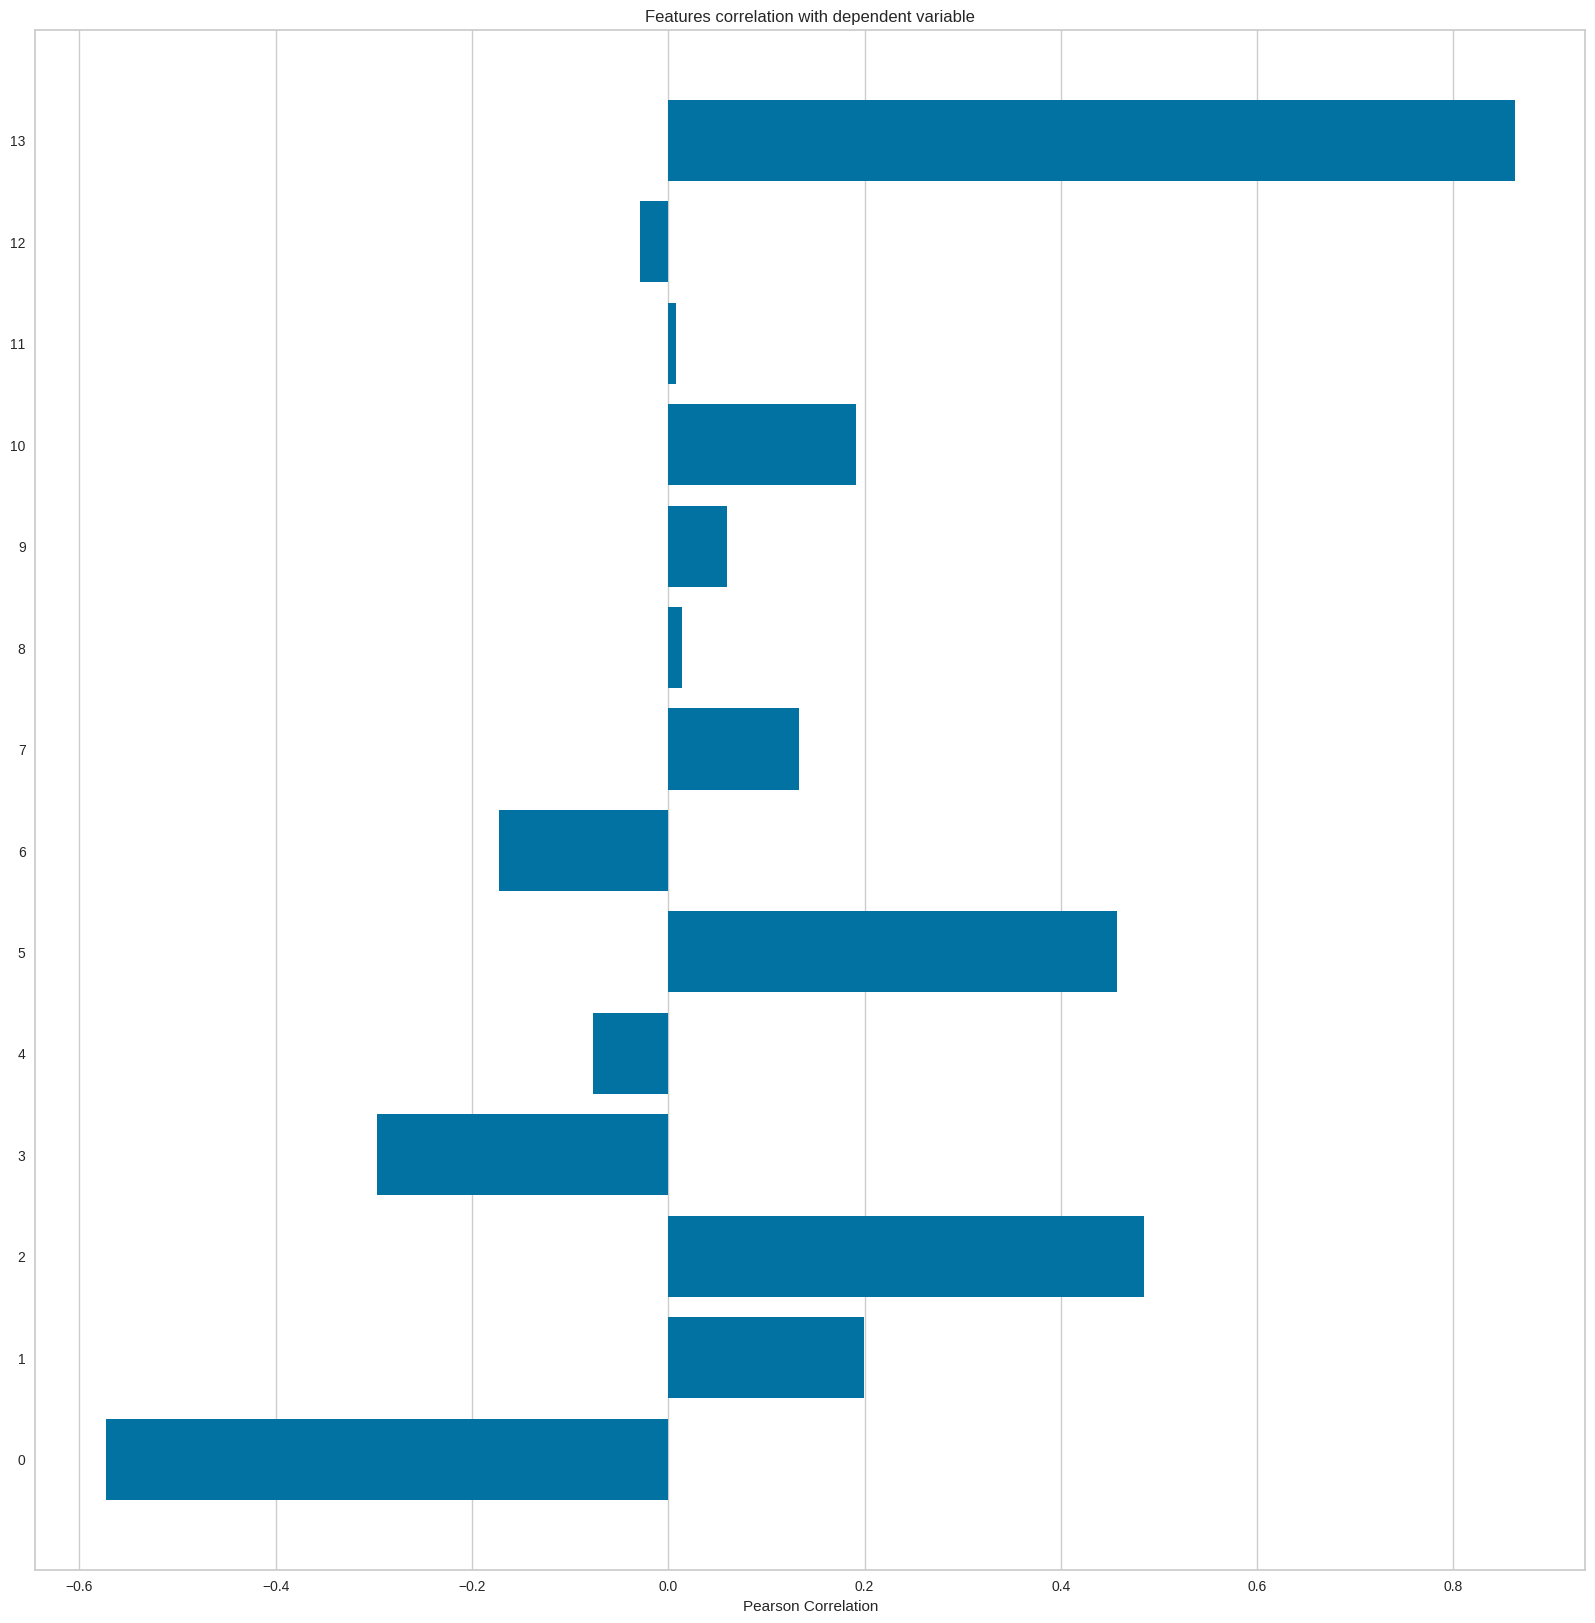

<Axes: title={'center': 'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [12]:
#creating a list of feature names
features = np.array(feature_names)

#Instantiate The visualizer 
visualizer = FeatureCorrelation(lables=features)

plt.rcParams['figure.figsize'] = (20,20)
visualizer.fit(x,y)
visualizer.show()

In [13]:
#Data understanding by visualization and EDA

<Axes: xlabel='decade', ylabel='count'>

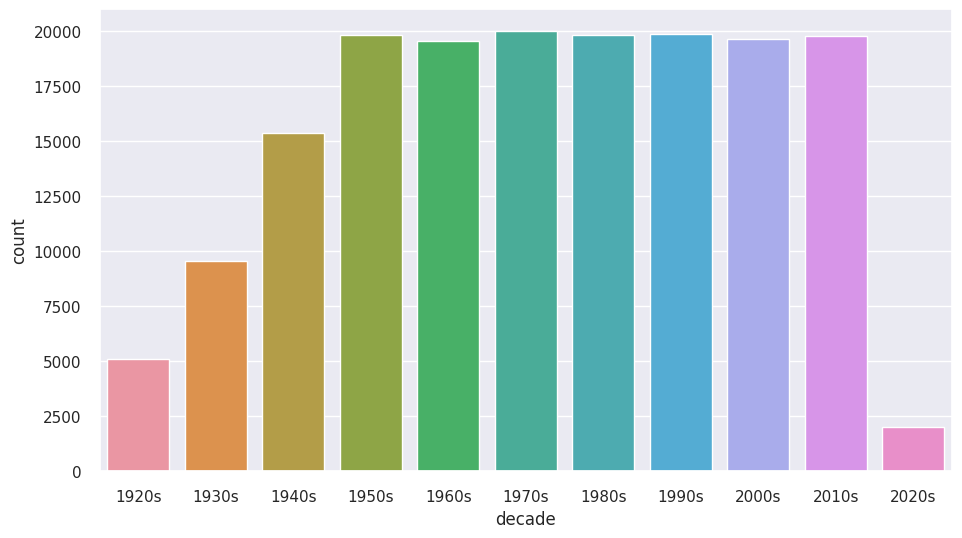

In [23]:
def get_decade(year):
  period_start = int(year/10) * 10
  decade = '{}s'.format(period_start)
  #print(decade)
  return decade

data['decade'] = data['year'].apply(get_decade)
sns.set(rc = {'figure.figsize':(11,6)})
sns.countplot(x = data['decade'])

In [26]:
top10_genres = genre_data.nlargest(4, 'popularity')
fig = px.bar(top10_genres, x = 'genres', y = ['valence','energy','danceability','acousticnesss'], barmode='group')
fig.show()

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

cluster_pipeline = Pipeline([('scaler', StandardScaler()), ('kmeans', KMeans(n_clusters= 10))])
X = genre_data.select_dtypes(np.number)
cluster_pipeline.fit(X)
genre_data['cluster'] = cluster_pipeline.predict(X)

In [28]:
#visualizing the clusters with t-SNE

from sklearn.manifold import TSNE

tsne_pipeline = Pipeline([('scaler', StandardScaler()), ('tsne',TSNE(n_components= 2, verbose = 1))])
genre_embedding = tsne_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=genre_embedding)
projection['genres'] = genre_data['genres']
projection['cluster'] = genre_data['cluster']
fig = px.scatter(projection, x='x', y='y', color='cluster', hover_data=['x','y','genres'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [30]:
pip install spotipy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 kB 5.2 MB/s eta 0:00:00


In [39]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import defaultdict

sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = os.environ['91d13d22f1c74451877aef96ae076fa6'], client_secret = os.environ['cefd070ef3614b68bd2bd308686a7dec']))

KeyError: ignored